# Exploratory Data Analysis (EDA): Car Shipment Delay Project
### Author: Amneet Kaur
### Goal: Business & Statistical Insights for Delay Prediction
This notebook explores the cleaned supply chain dataset to identify patterns, trends, and features that influence car shipment delays.

Our goal is to support feature engineering and modeling by gaining business and statistical insights into delay behavior.


## Step 1: Import Required Libraries and Load Data
We begin by importing necessary libraries for visualization and analysis, and then load the cleaned dataset "Cleaned_car_automated_dataset.csv".


In [1]:
## Import Required Libraries and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Initial Dataset Overview
Previewing the dataset structure, feature types, and a few sample records to understand the data.


In [2]:
# Load cleaned dataset
df=pd.read_csv("Cleaned_car_automated_dataset.csv")
# Quick overview of data shape
df.shape

(1010, 65)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Car_ID                             1010 non-null   object 
 1   Scheduled_Assembly_Date            1010 non-null   object 
 2   Engine_Delivery_Date               1010 non-null   object 
 3   Engine_Supplier_Region             1010 non-null   object 
 4   Engine_Supplier_Reliability        1010 non-null   float64
 5   Engine_Transport_Mode              1010 non-null   object 
 6   Is_Critical_Engine                 1010 non-null   int64  
 7   Transmission_Delivery_Date         1010 non-null   object 
 8   Transmission_Supplier_Region       1010 non-null   object 
 9   Transmission_Supplier_Reliability  1010 non-null   float64
 10  Transmission_Transport_Mode        1010 non-null   object 
 11  Is_Critical_Transmission           1010 non-null   int64

In [21]:
df.head()

,Car_ID,Scheduled_Assembly_Date,Engine_Delivery_Date,Engine_Supplier_Region,Engine_Supplier_Reliability,Engine_Transport_Mode,Is_Critical_Engine,Transmission_Delivery_Date,Transmission_Supplier_Region,Transmission_Supplier_Reliability,...,Infotainment_Supplier_Group,Engine_Reliability_Score,Transmission_Reliability_Score,Brake_System_Reliability_Score,Suspension_Reliability_Score,Infotainment_Reliability_Score,Traffic_Severity_Index,Month,Quarter,Rounded_Reliability
0,CAR_942,2023-01-31,2023-01-24,EAST,0.76,ROAD,1,2023-01-30,NORTH,0.79,...,NORTH_ROAD,0.302632,0.329114,0.282609,0.239130,0.310345,1.0,1,1,0.3
1,CAR_546,2023-01-31,2023-01-22,NORTH,0.75,SEA,1,2023-01-24,EAST,0.98,...,WEST_SEA,0.289474,0.328571,0.230769,0.311688,0.400000,1.0,1,1,0.4
2,CAR_465,2023-01-31,2023-01-29,WEST,0.74,AIR,0,2023-01-28,EAST,0.95,...,EAST_AIR,0.346154,0.328571,0.383562,0.356322,0.298851,1.0,1,1,0.3
3,CAR_807,2023-01-31,2023-02-05,EAST,0.85,ROAD,0,2023-02-03,EAST,0.92,...,NORTH_ROAD,0.302632,0.279070,0.273810,0.321839,0.310345,1.5,1,1,0.3
4,CAR_286,2023-01-31,2023-01-28,SOUTH,0.79,AIR,0,2023-01-31,SOUTH,0.79,...,WEST_SEA,0.270270,0.300000,0.260274,0.224490,0.400000,1.0,1,1,0.4


## Step 3: Convert Dates and Assign Types

Ensure that date fields are parsed correctly and categorical fields are typed properly to aid analysis and visualization.


In [4]:
# Convert relevant columns to datetime
date_columns = ["Scheduled_Assembly_Date", "Engine_Delivery_Date", "Transmission_Delivery_Date","Brake_System_Delivery_Date", "Suspension_Delivery_Date", "Infotainment_Delivery_Date"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col])
# Convert categorical columns to 'category' dtype for efficient analysis
categorical_cols = ['Engine_Supplier_Region', 'Engine_Transport_Mode', 'Transmission_Supplier_Region','Transmission_Transport_Mode', 'Brake_System_Supplier_Region', 'Brake_System_Transport_Mode',
    'Suspension_Supplier_Region', 'Suspension_Transport_Mode', 'Infotainment_Supplier_Region',
    'Infotainment_Transport_Mode', 'Engine_Delay_Reason', 'Transmission_Delay_Reason',
    'Brake_System_Delay_Reason', 'Suspension_Delay_Reason', 'Infotainment_Delay_Reason',
    'Order_Urgency', 'Weather_Condition_On_Delivery', 'Production_Shift']

for col in categorical_cols:
    df[col] = df[col].astype('category')



## Step 4: Target Variable Distribution – `Car_Delayed`
What is the distribution of Car_Delayed (classification target)?

- We analyze the target variable distribution to assess balance across classes.

/tmp/ipython-input-5-217924459.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Car_Delayed", data=df, palette="Set2")


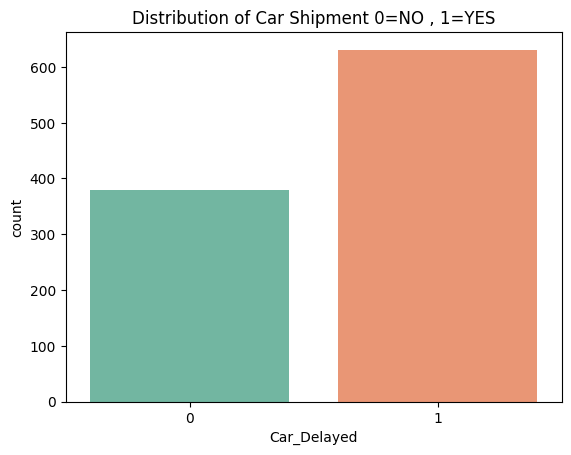

In [5]:
sns.countplot(x="Car_Delayed", data=df, palette="Set2")
plt.title("Distribution of Car Shipment 0=NO , 1=YES")
plt.show()

#####Clarification of Labels:
- 0 = Shipment On-Time, 1 = Shipment Delayed

**Key Insight:**

- Class Imbalance Exists: Around 62% of shipments are delayed (Car_Delayed = 1)

- About 38% are not delayed (Car_Delayed = 0)
- This shows a class imbalance, which should be handled during model training (e.g., using class weights, resampling,SMOTE etc.).

**Business Implication:**

A high delay rate (>60%) is a serious issue operationally — it suggests inefficiencies or risks in the supply chain that need investigation.


## Step 5: Distribution of Delay Days and Financial Impact
How are Delay_Days and Financial_Impact_USD distributed?
- We explore how long delays last and how much financial loss they create.

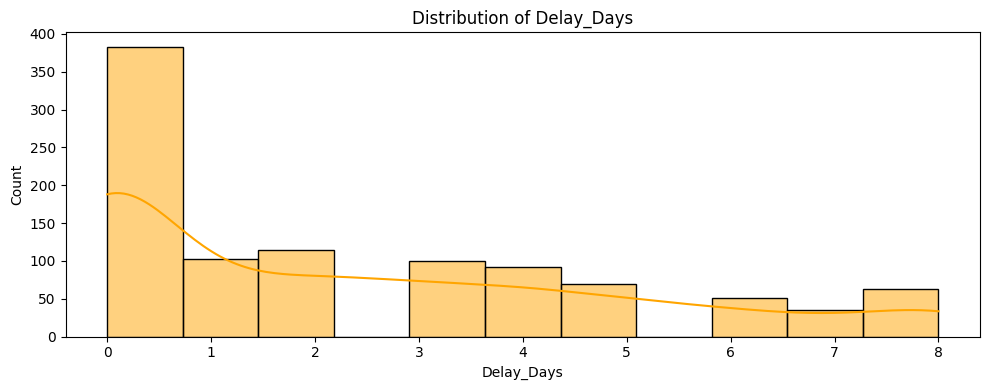

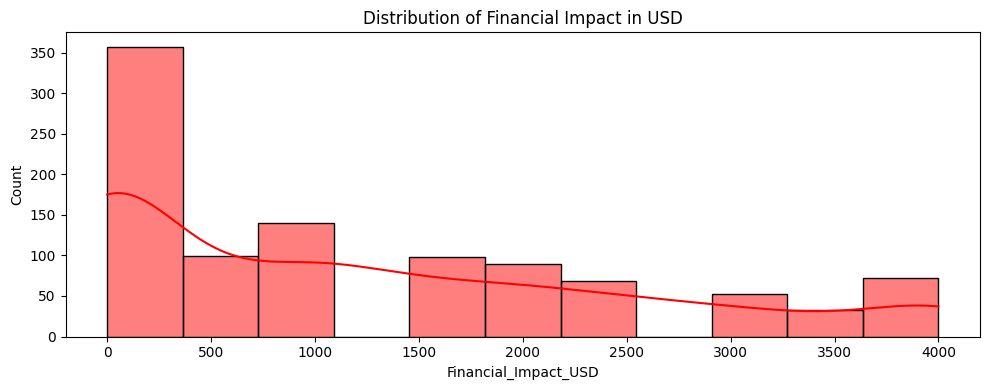

In [6]:
plt.figure(figsize=(10,4))
sns.histplot(x=df["Delay_Days"], kde=True,color="orange")
plt.title("Distribution of Delay_Days")

plt.tight_layout()
plt.show()
plt.figure(figsize=(10,4))
sns.histplot(x=df["Financial_Impact_USD"], kde=True,color="red")
plt.title("Distribution of Financial Impact in USD")
plt.tight_layout()
plt.show()

**Right-Skewed Distribution:**

Most shipments that are delayed experience a delay of 0 to 2 days, with frequency dropping as delay days increase.

Very few shipments are delayed beyond 6–8 days.

**Business Implication:**

Minor delays are common and likely manageable.

Long delays (6+ days), though rare, may cause disproportionate financial or customer satisfaction issues — these should be investigated.

**Modeling Note:**
Because of the skewed distribution, we might need to consider transforming the target (e.g., log-scale) for regression models to reduce the effect of outliers.



## Step 6: Correlation with Target Variables
Which features show correlation with target variables?
- We assess how numerical features relate to delay flags and delay days.

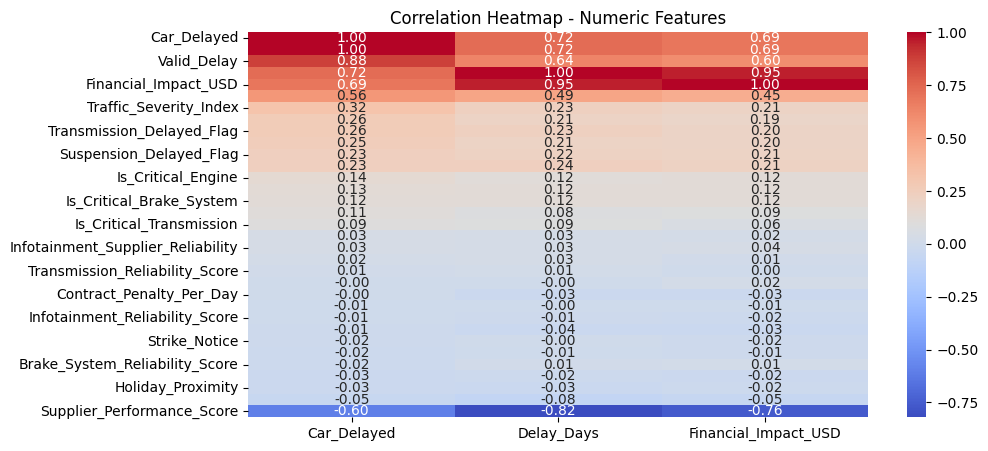

In [7]:
corr = df.corr(numeric_only=True)  # Computes correlation matrix only for numeric columns
# Correlation with target columns only
target_corr = corr[['Car_Delayed', 'Delay_Days', 'Financial_Impact_USD']].sort_values(by='Car_Delayed', ascending=False)
plt.figure(figsize=(10,5))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap - Numeric Features")
plt.show()

Insight:

- Delay_Days is strongly correlated with Financial_Impact_USD, suggesting longer delays significantly increase financial losses.

- Car_Delayed has a moderate correlation with both Delay_Days and Financial_Impact_USD.

- Negative correlations observed with various reliability scores—indicating better reliability is linked to fewer delays and lower costs.

## Step 7: Distributions of Key Numerical Features

Examine reliability scores and delay counts to understand their spread.

## Step 8: Distributions of Key Binary Features

These features often indicate part-level delays or critical component flags.


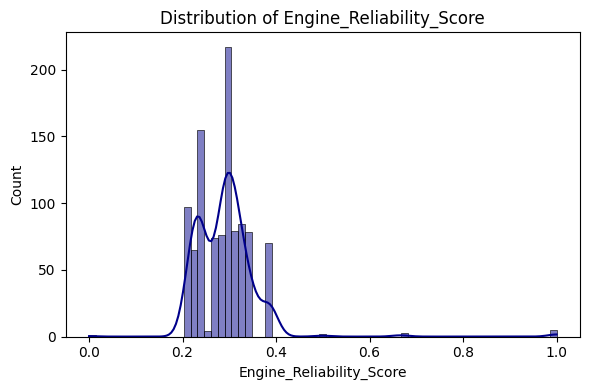

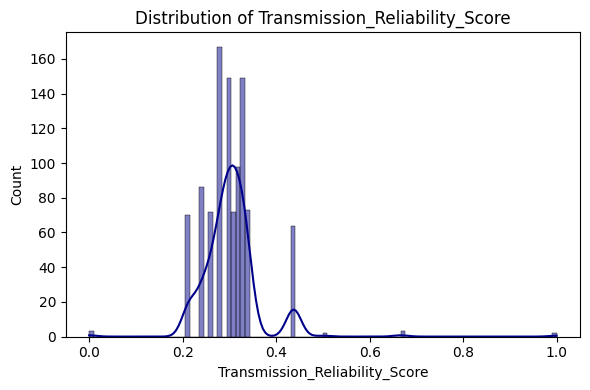

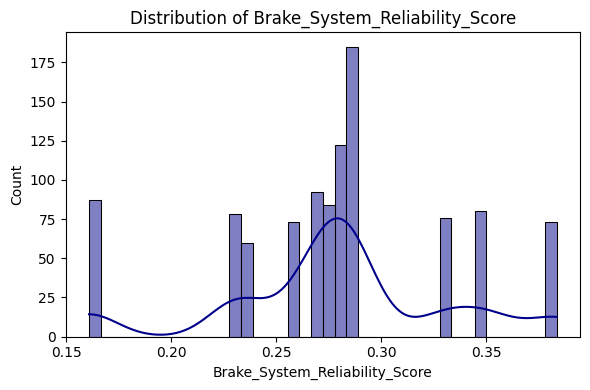

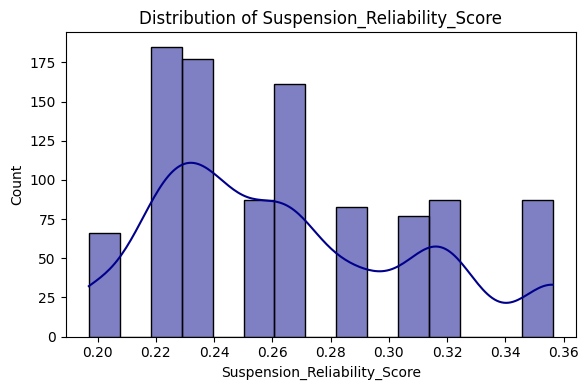

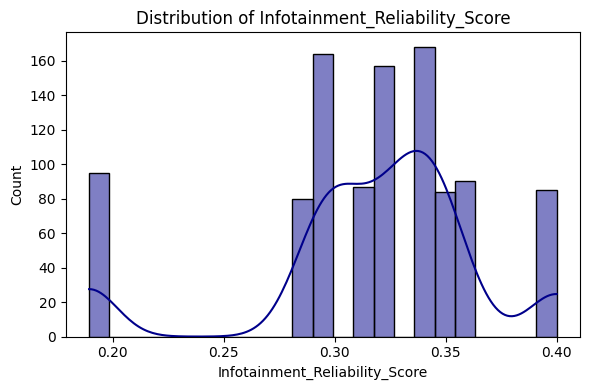

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


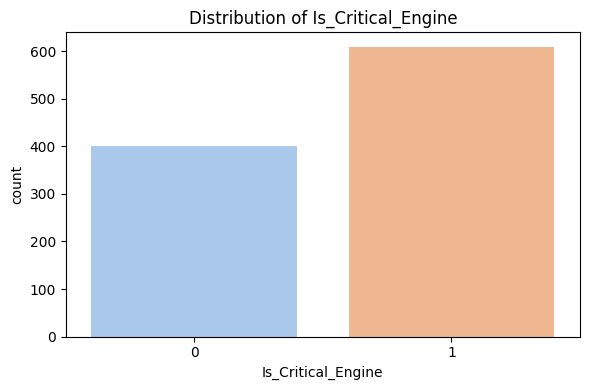

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


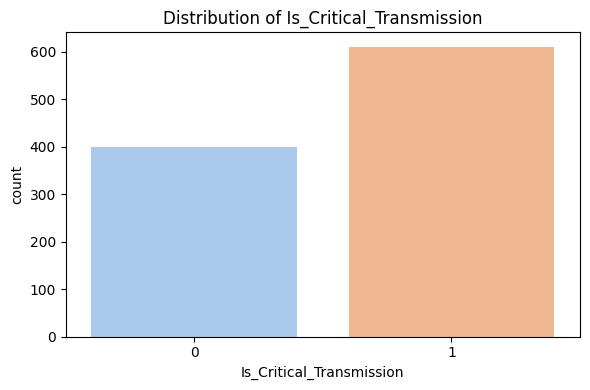

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


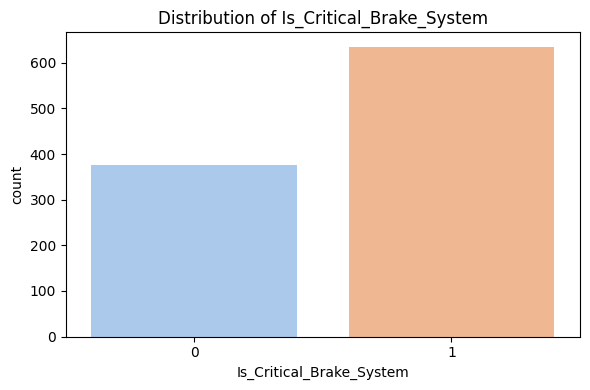

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


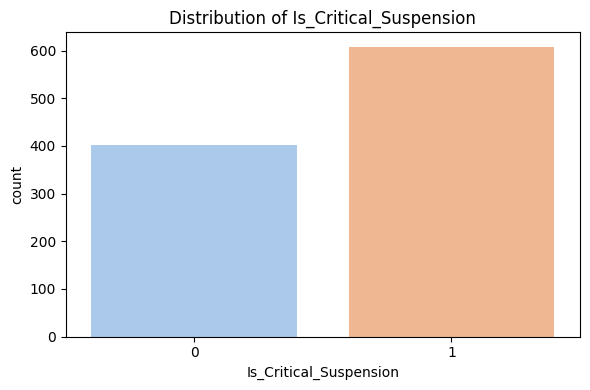

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


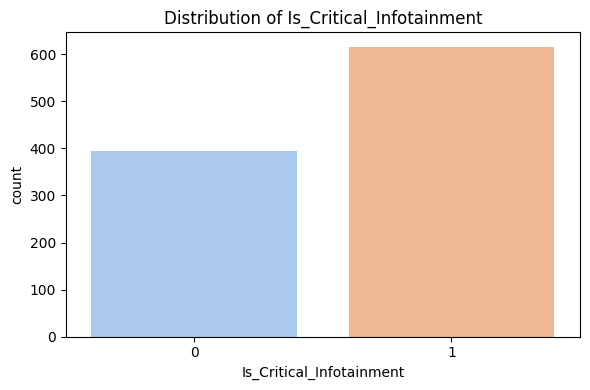

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


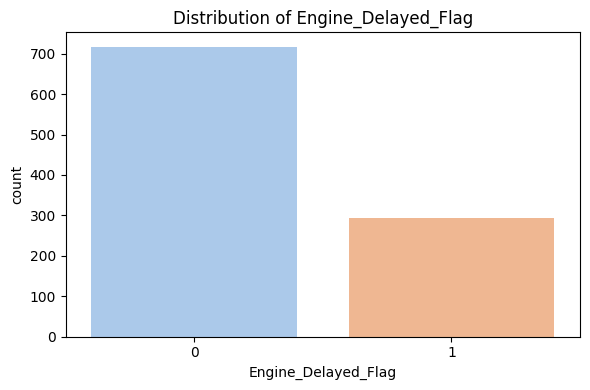

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


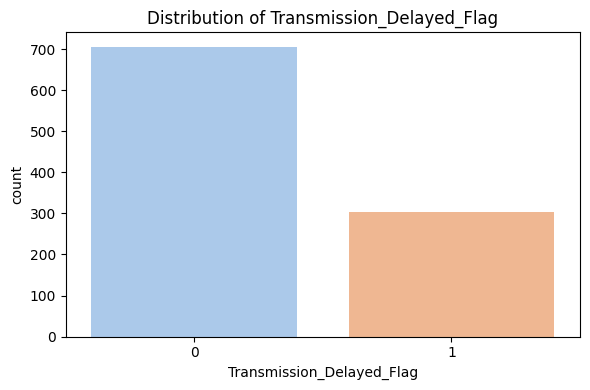

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


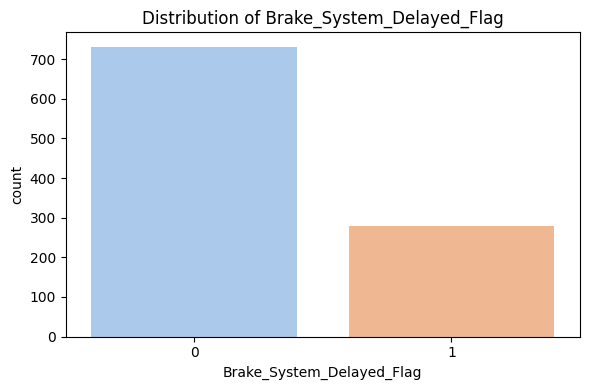

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


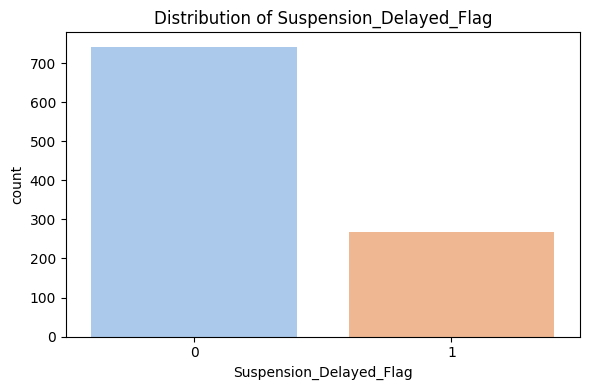

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


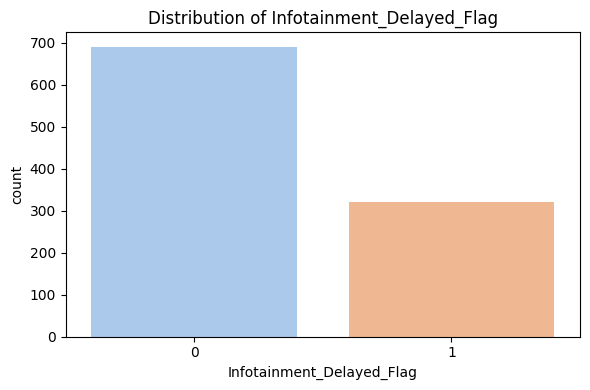

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


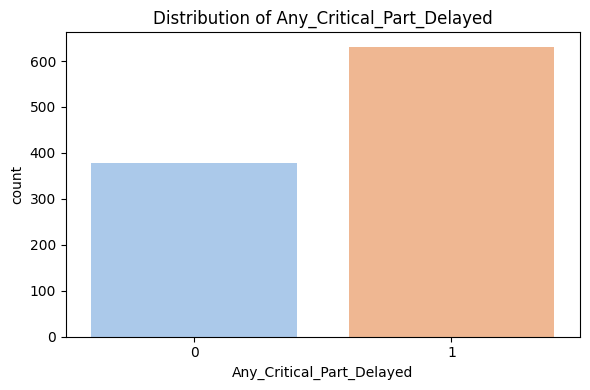

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


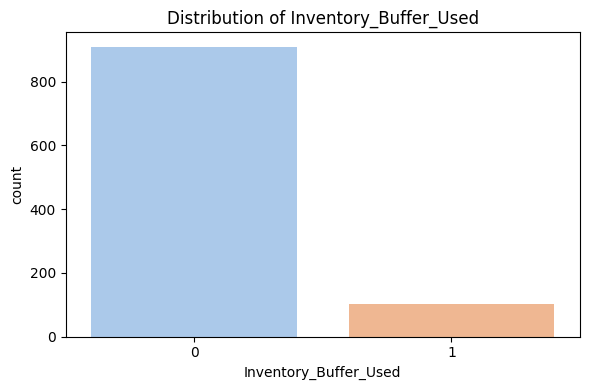

/tmp/ipython-input-8-411098908.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="pastel")


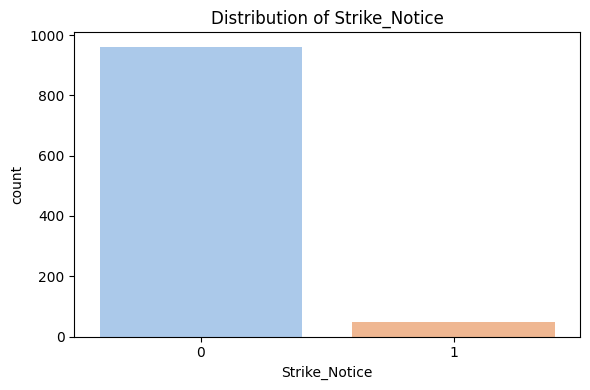

In [8]:
# Distribution of continuous/numerical features like reliability, proximity to holidays, and total delays
graph_cols=["Engine_Reliability_Score","Transmission_Reliability_Score","Brake_System_Reliability_Score","Suspension_Reliability_Score","Infotainment_Reliability_Score"]

for col in graph_cols:
  plt.figure(figsize=(6, 4))
  # Histogram + KDE to show the shape of data distribution for each numeric feature
  sns.histplot(df[col],kde=True,color="darkblue")
  plt.title(f'Distribution of {col}')
  plt.tight_layout()
  plt.show()
# Visualizing distribution (count of 0s and 1s) for all binary features like delayed flags and criticality flags
binary_cols=["Is_Critical_Engine", "Is_Critical_Transmission", "Is_Critical_Brake_System", "Is_Critical_Suspension", "Is_Critical_Infotainment",  'Engine_Delayed_Flag','Transmission_Delayed_Flag','Brake_System_Delayed_Flag','Suspension_Delayed_Flag','Infotainment_Delayed_Flag','Any_Critical_Part_Delayed','Inventory_Buffer_Used','Strike_Notice']
for col in binary_cols:
  plt.figure(figsize=(6,4))
  # Countplot shows how many 0s and 1s exist in each binary feature
  sns.countplot(x=col, data=df, palette="pastel")
  plt.title(f"Distribution of {col}")
  plt.tight_layout()
  plt.show()

#### Distribution of Engine_Reliability_Score
Insight:

- Most engines have average reliability, with scores mostly between 0.5 and 0.6.

- A few engines have very low scores, which could cause delays or issues.

#### Distribution of Transmission_Reliability_Score

Insight:

- The majority of transmissions have lower reliability, peaking around 0.4.

- This may be a potential weak point in the system.
##### Distribution of Brake_System_Reliability_Score

Insight:

- There are two main groups of brake systems—some perform better than others.

- This split might be due to different suppliers or production batch

####Distribution of Infotainment_Reliability_Score

Insight:

- Scores are evenly spread around 0.3, showing consistent quality.

- Infotainment systems seem to be more stable compared to other parts.systems.
#### Distribution of Suspension_Reliability_Score

Insight:

- Scores are spread out with no clear pattern.

- This means suspension quality is unpredictable, possibly from inconsistent suppliers.
#### Distribution of Is_Critical_Engine
Insight:

- Almost half of the engines are marked as critical.

- These require closer monitoring and stricter quality checks to avoid delays.
#### Critical Parts & Delay Flags
- Many cars have critical systems like brakes, suspension, infotainment, and transmission marked as important.

- Some cars show delays in parts like engine, brakes, suspension, and transmission.

- Most delays are still less than non-delays, but the number is still quite high.
#### Infotainment Delays:
- Rare compared to other parts. Usually delivered on time.

#### Any Critical Part Delayed:
- More than half the cars had at least one important part delayed — this shows a bigger issue.
#### Inventory Buffer:
- Almost never used. This may leave the system unprepared during supply issues.

## Shipment Delay vs Key Categorical Features
## Step 9: Shipment Delay vs Key Categorical Features

We compare shipment delay counts across strategic categorical dimensions.


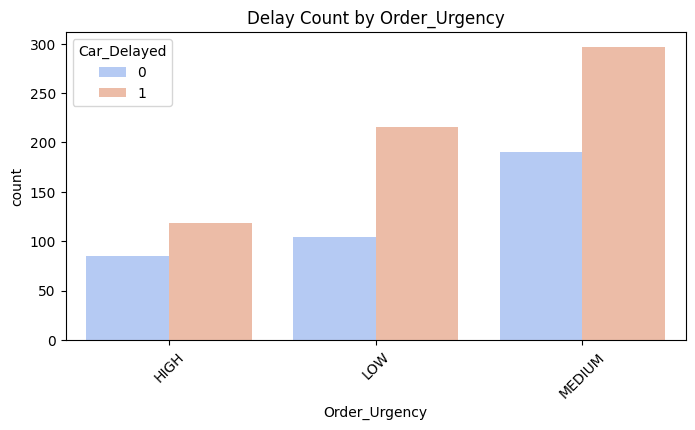

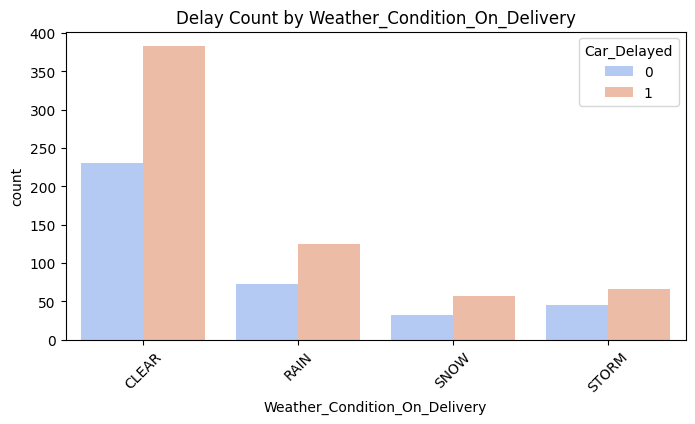

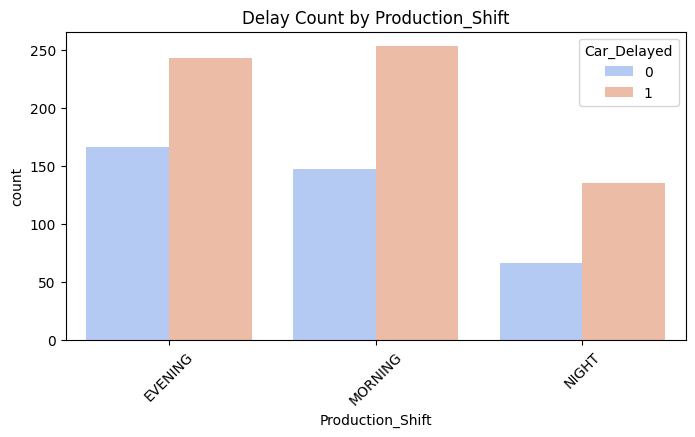

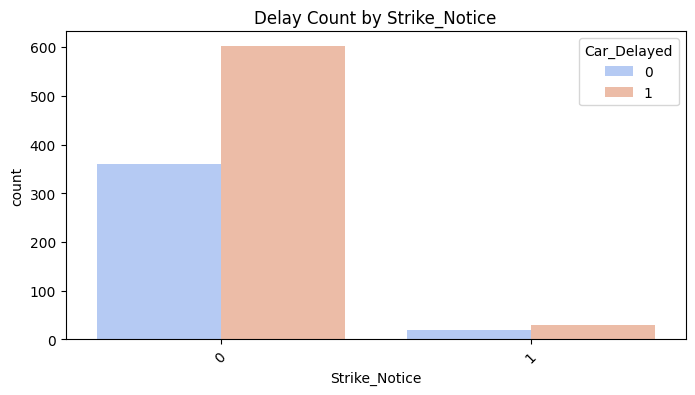

In [9]:
categorical_features = ['Order_Urgency', 'Weather_Condition_On_Delivery', 'Production_Shift', 'Strike_Notice']
# Looping through each categorical column to visualize the distribution of categories
for col in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='Car_Delayed', data=df, palette='coolwarm')
    plt.title(f'Delay Count by {col}')
    plt.xticks(rotation=45)
    plt.show()


#### Weather Conditions:
- Most delays happen in clear weather (because it’s the most common), but rain and storms also lead to more delays.

#### Order Urgency:
- Orders marked as "High Urgency" actually have more delays, maybe because they are rushed or harder to fulfill fast.

#### Production Shifts:
- Evening shift has the most delays. Morning shift performs better.
#### Strike Notice:
- Strikes are rare, but when they happen, delays increase a lot.

## Step 10: Seasonal Trends – Month and Quarter

We check for seasonal shipment delay patterns using time-based features.


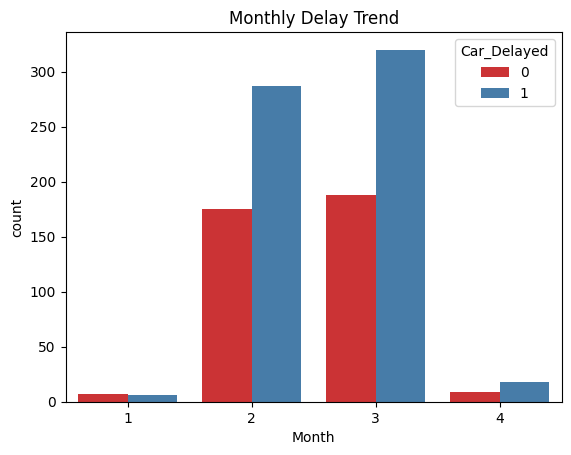

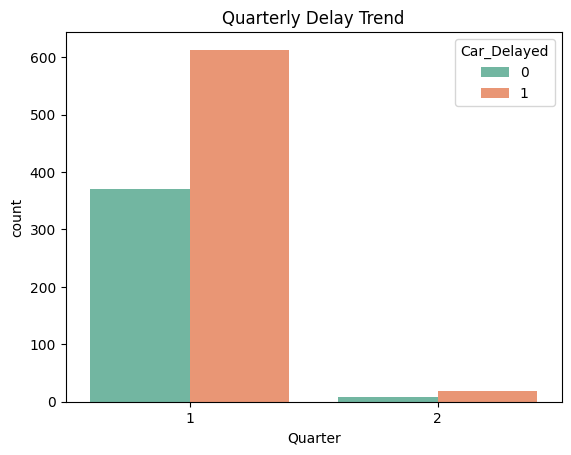

In [10]:
df['Month'] = df['Scheduled_Assembly_Date'].dt.month
df['Quarter'] = df['Scheduled_Assembly_Date'].dt.quarter

# Shipment Delay by Month
sns.countplot(x='Month', hue='Car_Delayed', data=df, palette='Set1')
plt.title('Monthly Delay Trend')
plt.show()

# Shipment Delay by Quarter
sns.countplot(x='Quarter', hue='Car_Delayed', data=df, palette='Set2')
plt.title('Quarterly Delay Trend')
plt.show()


#### Monthly Trend:
- Delays were highest in March, and then dropped in April and May.
#### Quarterly Trend:
- Q1 (Jan–Mar) had the most delays. Big drop after that — possibly due to changes or seasonal issues.

## Step 11: Breakdown of Delay Reasons by Car Part

This section shows the distribution of reasons for delays associated with each car component. This helps identify which causes are most frequent across different systems.


/tmp/ipython-input-11-1670808567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Paired')


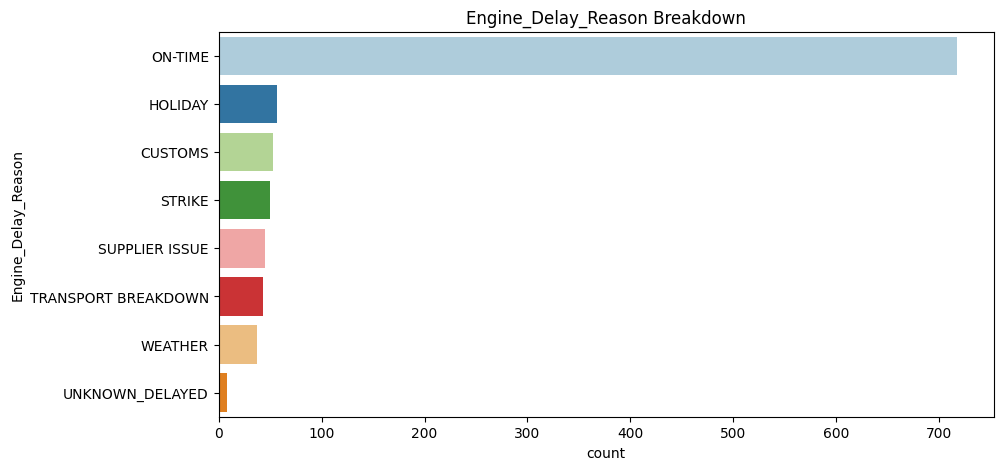

/tmp/ipython-input-11-1670808567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Paired')


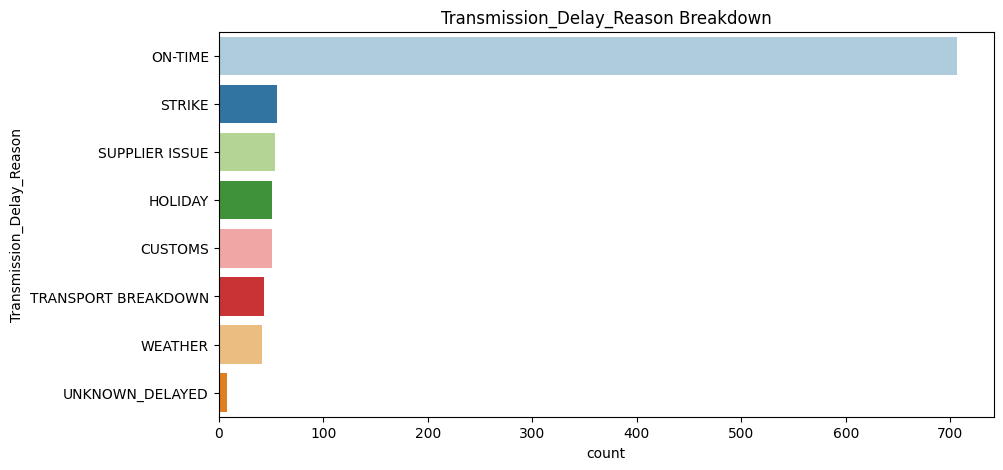

/tmp/ipython-input-11-1670808567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Paired')


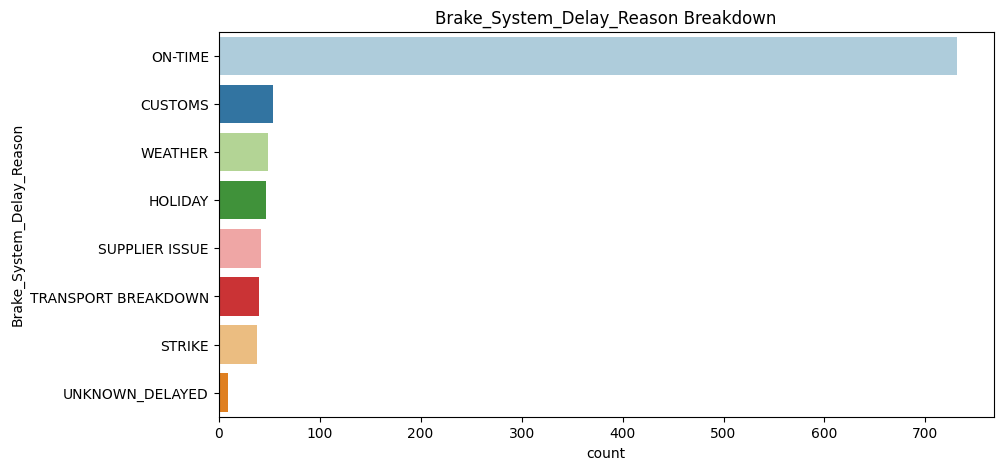

/tmp/ipython-input-11-1670808567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Paired')


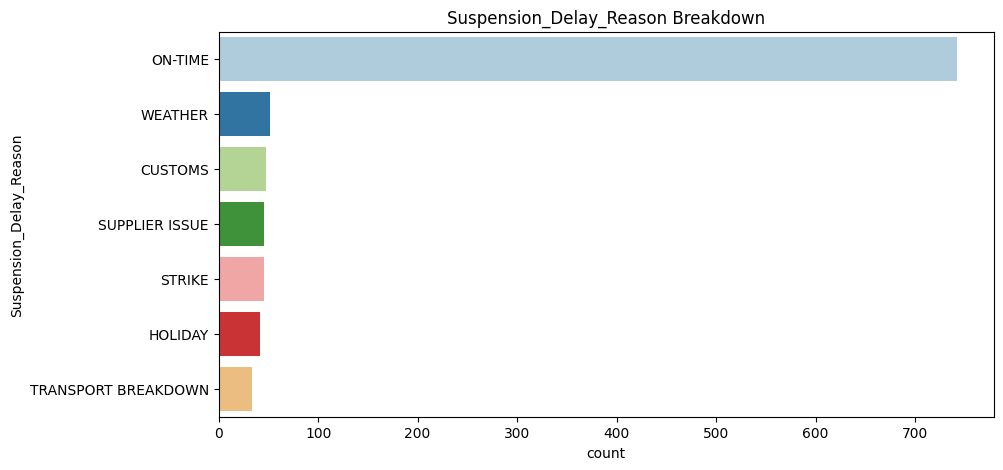

/tmp/ipython-input-11-1670808567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Paired')


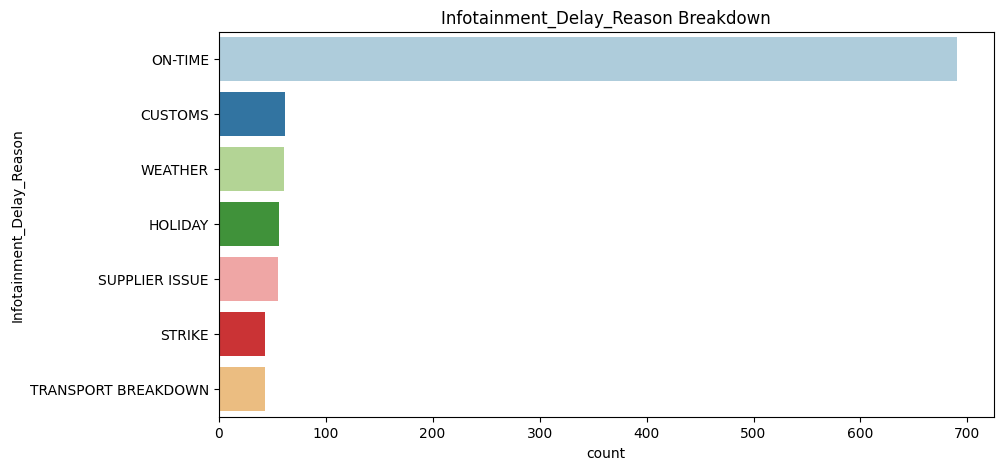

In [11]:
delay_reason_cols = ['Engine_Delay_Reason', 'Transmission_Delay_Reason',
                     'Brake_System_Delay_Reason', 'Suspension_Delay_Reason',
                     'Infotainment_Delay_Reason']
# Visualizing the count of delay reasons for each component to see which causes are most common
for col in delay_reason_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='Paired')
    plt.title(f'{col} Breakdown')
    plt.show()

#### Delay Reasons by Part:

- “On-Time” issues appear a lot — meaning the tracking parts are often not delayed.

- Other common reasons: Customs, Strikes, and Supplier problems.

## Step 12: Financial Impact & Delay Days by Urgency and Shift

We analyze how order urgency and production shifts influence delay durations and financial costs.


/tmp/ipython-input-12-3289659223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Financial_Impact_USD', data=df, palette='Set3')


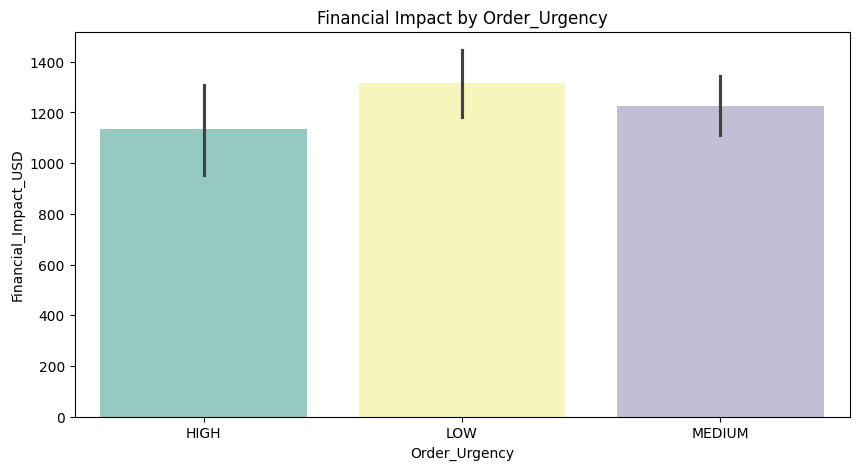

/tmp/ipython-input-12-3289659223.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Delay_Days', data=df, palette='Set2')


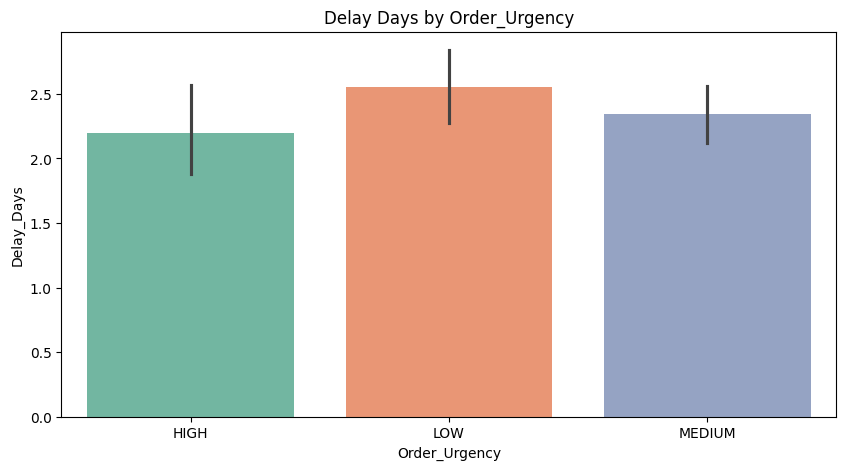

/tmp/ipython-input-12-3289659223.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Financial_Impact_USD', data=df, palette='Set3')


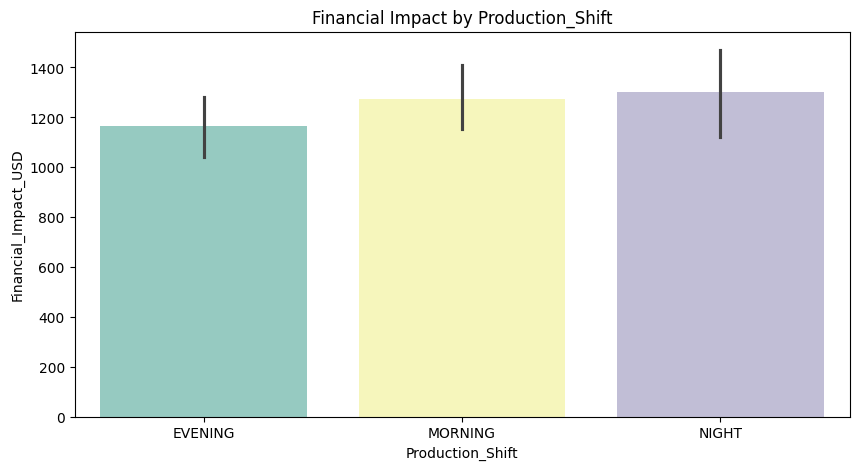

/tmp/ipython-input-12-3289659223.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Delay_Days', data=df, palette='Set2')


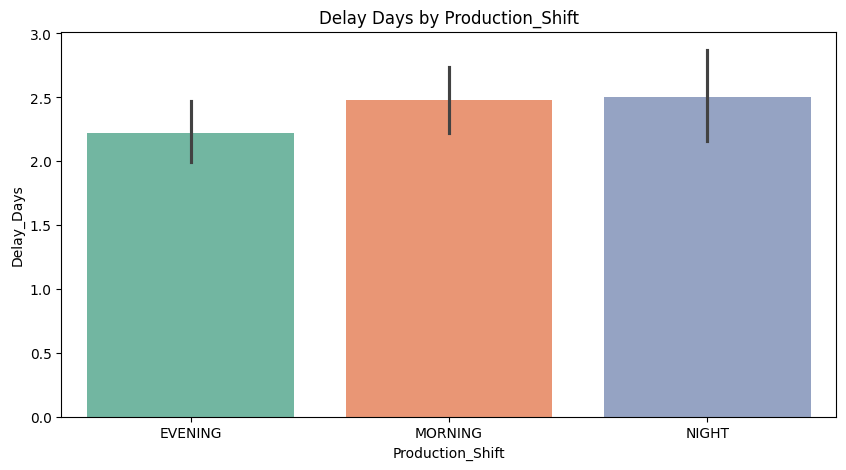

In [12]:
# Analyzing how financial impact and delay days vary by order urgency and production shift
for col in ['Order_Urgency', 'Production_Shift']:
    plt.figure(figsize=(10, 5))
    # Average financial impact per category (e.g., High/Medium/Low urgency)
    sns.barplot(x=col, y='Financial_Impact_USD', data=df, palette='Set3')
    plt.title(f'Financial Impact by {col}')
    plt.show()

    plt.figure(figsize=(10, 5))
    # Average delay days per category
    sns.barplot(x=col, y='Delay_Days', data=df, palette='Set2')
    plt.title(f'Delay Days by {col}')
    plt.show()

#### Delay Days by Urgency:
- Urgent orders tend to be delayed slightly longer than others.

#### Financial Loss by Shift:
- Evening shift causes the highest cost due to delays.

#### Delay Days by Production Shift

- Bar chart of average delay days by production shift.

Insight: All shifts have similar delay days (2.5); no shift is significantly worse.

#### Financial Impact by Production Shift

- Bar chart showing financial impact for evening, morning, and night shifts.

Insight: Morning shift shows slightly higher average cost, but differences are marginal.



## Step 13: Relationship Between Delay Duration and Financial Cost

This scatterplot shows whether longer delays are associated with greater financial impact, and whether delayed cars tend to show higher costs.


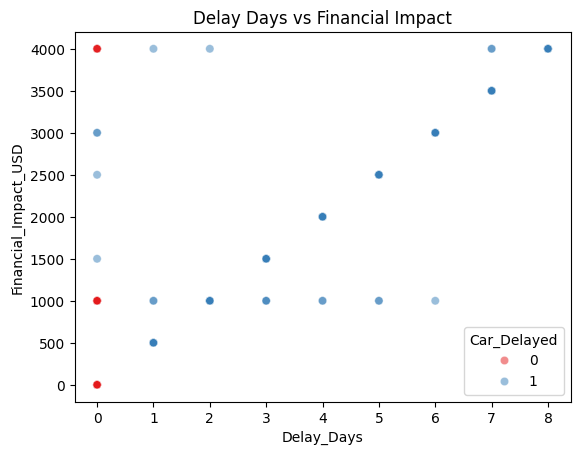

In [13]:
#Delay Days vs Financial Impact
sns.scatterplot(data=df, x='Delay_Days', y='Financial_Impact_USD',hue="Car_Delayed", palette='Set1', alpha=0.5)
plt.title('Delay Days vs Financial Impact')
plt.show()

Delay Days vs Financial Impact

- Scatter plot mapping delay days to financial impact, color-coded by delay status.

Insight: Strong positive trend — as delay days increase, financial impact increases proportionally.


## Number of Delayed Parts vs Financial Cost

We examine if the total number of delayed parts correlates with the financial impact.


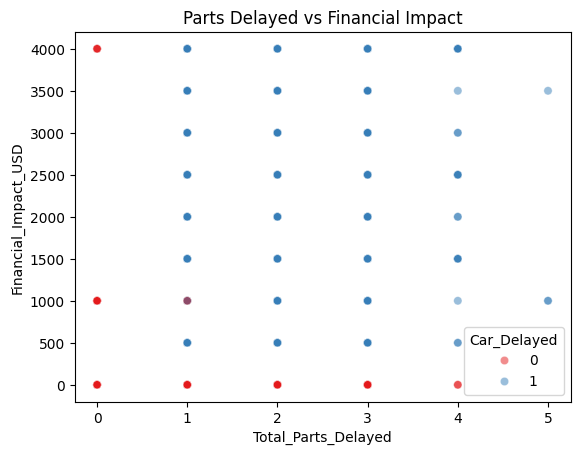

In [14]:
# Total Parts Delayed vs Financial Impact
sns.scatterplot(data=df, x='Total_Parts_Delayed', y='Financial_Impact_USD',hue="Car_Delayed", palette='Set1', alpha=0.5)
plt.title('Parts Delayed vs Financial Impact')
plt.show()

Parts Delayed vs Financial Impact

- Scatter plot showing parts delayed vs financial cost.

Insight: More parts delayed generally leads to higher financial impact; trend is clear, though slightly scattered.


## Step 14: Financial Impact for Critical vs Non-Critical Parts

These boxplot explore whether delays to parts marked as "critical" result in higher financial costs.


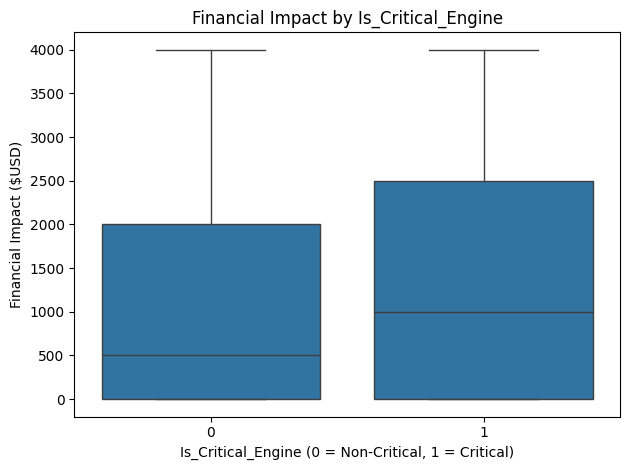

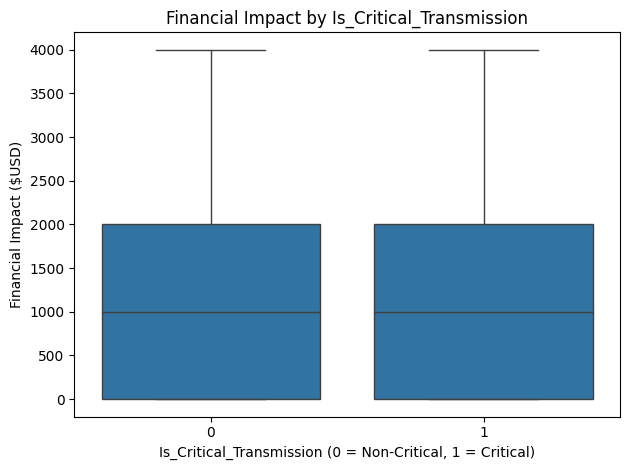

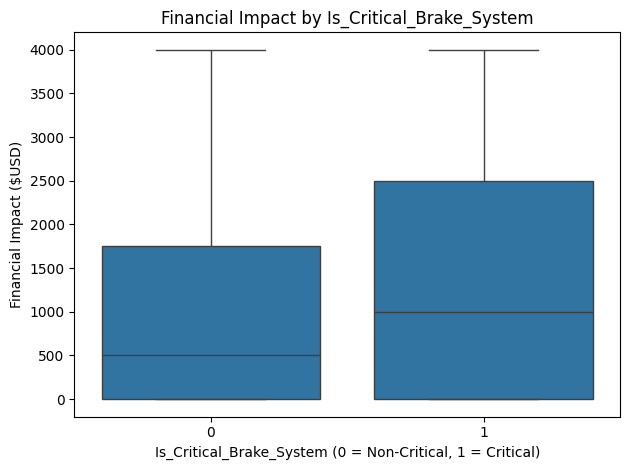

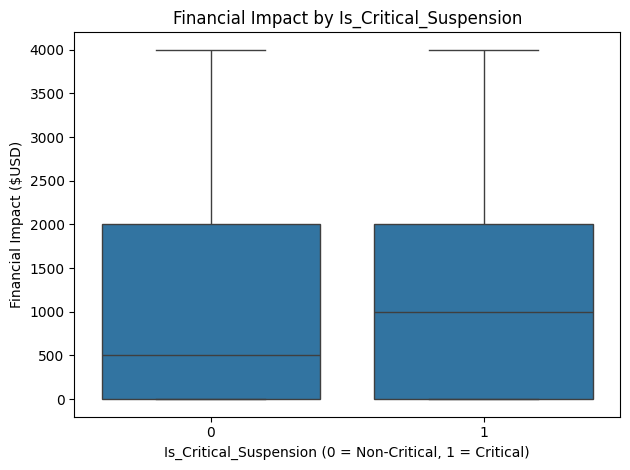

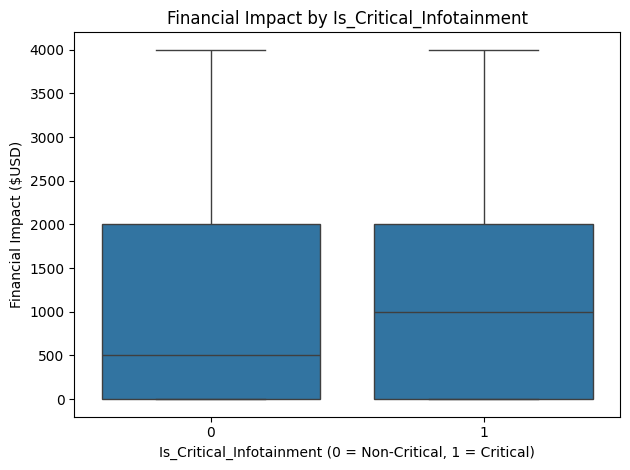

In [15]:
# Visualizing how financial impact varies depending on whether each part is critical
critical_parts = [
    'Is_Critical_Engine',
    'Is_Critical_Transmission',
    'Is_Critical_Brake_System',
    'Is_Critical_Suspension',
    'Is_Critical_Infotainment'
]

for col in critical_parts:
  # Boxplot shows distribution of financial impact grouped by criticality of the part (0 = not critical, 1 = critical)
  sns.boxplot(x=col, y='Financial_Impact_USD', data=df)
  plt.title(f'Financial Impact by {col}')
  plt.xlabel(f'{col} (0 = Non-Critical, 1 = Critical)')
  plt.ylabel('Financial Impact ($USD)')
  plt.tight_layout()
  plt.show()

Financial Impact by Is_Critical_Brake_System

- Boxplot comparing financial impact for cars with and without a critical brake system.

- Insight: Median impact is slightly higher when the brake system is critical. Outliers exist, but no drastic distribution difference.

Financial Impact by Is_Critical_Infotainment

- Boxplot for infotainment-critical vs non-critical parts.

- Insight: Minimal difference; infotainment delays do not significantly drive cost increases.

Financial Impact by Is_Critical_Suspension

- Boxplot comparing financial impact based on suspension criticality.

- Insight: Little to no variation in median or spread; critical suspension has limited financial influence.

#### Financial Impact by Is_Critical_Engine

- Boxplot for engine criticality.

Insight: Critical engines are associated with a higher median financial impact and broader spread.

#### Financial Impact by Is_Critical_Transmission

- Boxplot for transmission criticality.

Insight: Minimal difference in median financial cost between critical and non-critical transmissions.



## Step 15: High Financial Cost Without Delay

We filter unusual cases where cars weren’t delayed but incurred high cost. These may point to internal decisions like buffer stock, urgent shipments, or supplier risk.


In [16]:
df[(df['Total_Parts_Delayed'] == 0) &
   (df['Financial_Impact_USD'] > 3000)][
    ['Car_ID', 'Financial_Impact_USD', 'Valid_Delay', 'Weather_Condition_On_Delivery',
     'Engine_Transport_Mode', 'Order_Urgency', 'Inventory_Buffer_Used', 'Strike_Notice',
     'Is_Critical_Engine', 'Engine_Reliability_Score']
].head(10)



,Car_ID,Financial_Impact_USD,Valid_Delay,Weather_Condition_On_Delivery,Engine_Transport_Mode,Order_Urgency,Inventory_Buffer_Used,Strike_Notice,Is_Critical_Engine,Engine_Reliability_Score
474,CAR_647,4000.0,False,CLEAR,SEA,MEDIUM,1,0,0,0.243590
608,CAR_892,4000.0,False,CLEAR,SEA,HIGH,0,0,1,0.243590
960,CAR_649,4000.0,False,CLEAR,AIR,MEDIUM,0,0,0,0.270270
971,CAR_349,4000.0,False,CLEAR,SEA,MEDIUM,0,0,1,0.316456


Several cars incurred a $4000 financial impact despite not being delayed and no weather, buffer, or strike issues. This suggests that hidden operational decisions — like choosing premium transport modes or managing perceived supplier risk — are driving up cost even when delivery is successful. These insights reveal that cost avoidance may not equal cost efficiency, and supply chain strategies should balance delay prevention with budget control.

## Step 16: Inventory Buffer Usage and Delay Rate

We analyze whether using an inventory buffer (i.e., backup parts) reduces the likelihood of a car being delayed.


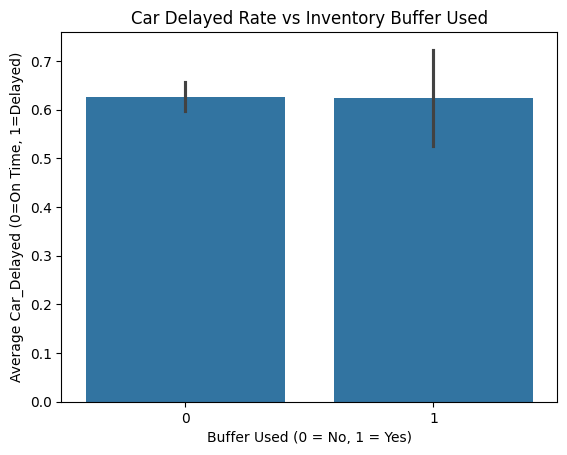

In [17]:
sns.barplot(x='Inventory_Buffer_Used', y='Car_Delayed', data=df)
plt.title('Car Delayed Rate vs Inventory Buffer Used')
plt.xlabel('Buffer Used (0 = No, 1 = Yes)')
plt.ylabel('Average Car_Delayed (0=On Time, 1=Delayed)')
plt.show()


Car Delayed Rate vs Inventory Buffer Used

-  Bar plot showing delay rate for cars with vs without buffer inventory.

Insight: Delay rates are nearly identical (67%), suggesting buffer inventory as currently used has limited effectiveness.



## Step 17: Monthly Financial Impact Trend

Shows how total financial losses varied month to month, potentially reflecting operational or seasonal shifts.


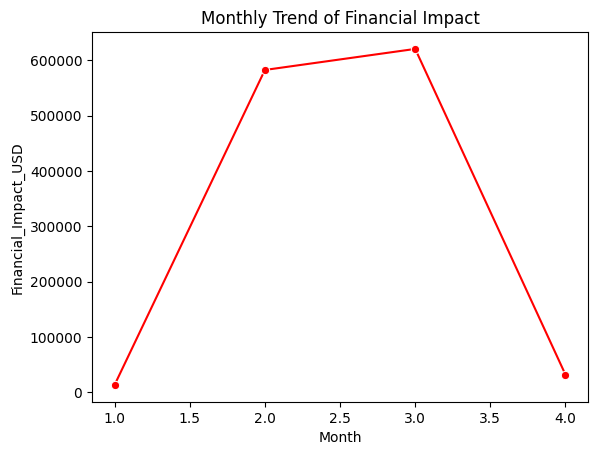

In [18]:
monthly_cost = df.groupby('Month')['Financial_Impact_USD'].sum().reset_index()
sns.lineplot(x='Month', y='Financial_Impact_USD', data=monthly_cost, marker='o', color='red')
plt.title('Monthly Trend of Financial Impact')
plt.show()


Monthly Trend of Financial Impact

- Line chart showing financial impact over the months (1 to 4).

Insight: Sharp peak in Month 2, followed by decline. Indicates seasonal or operational spike in that month.


## Step 18: Supplier Reliability Impact on Delay and Cost

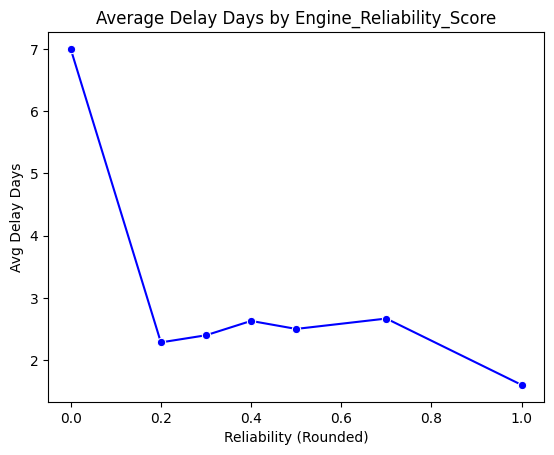

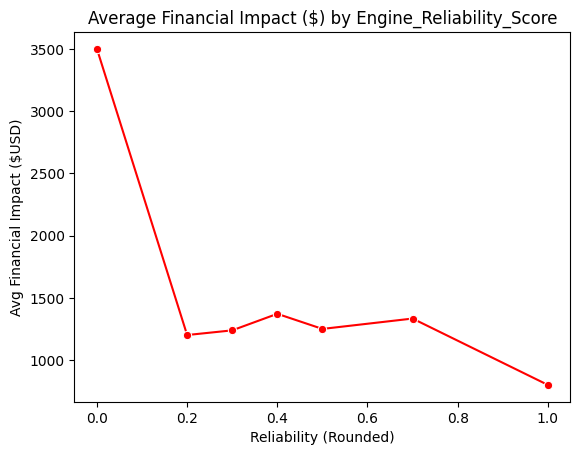

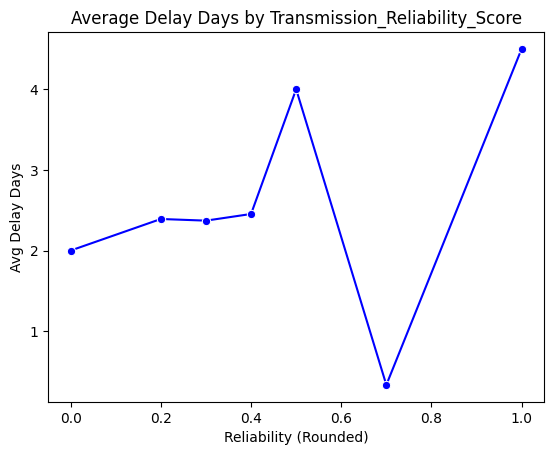

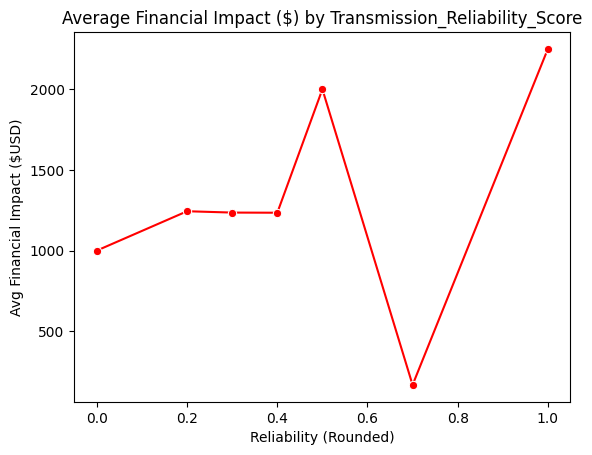

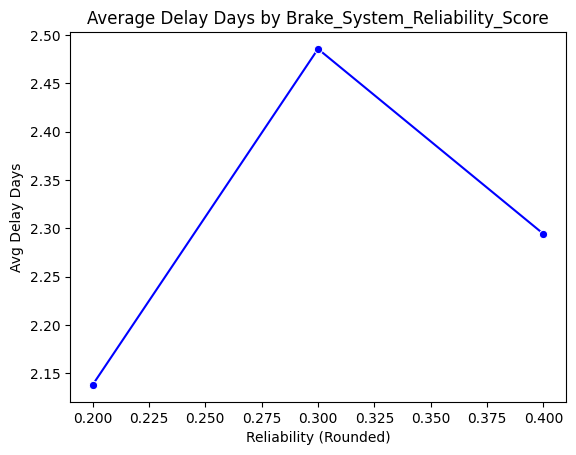

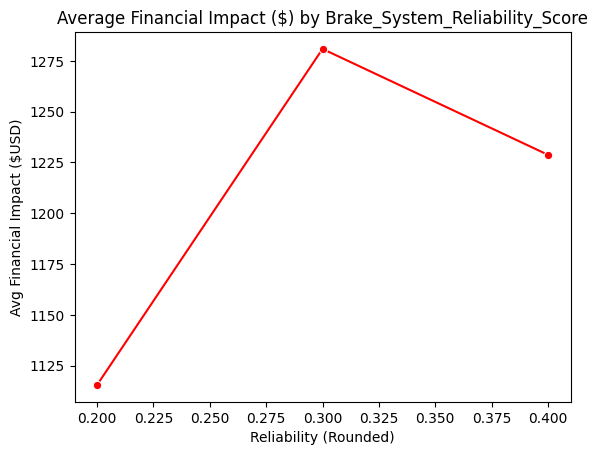

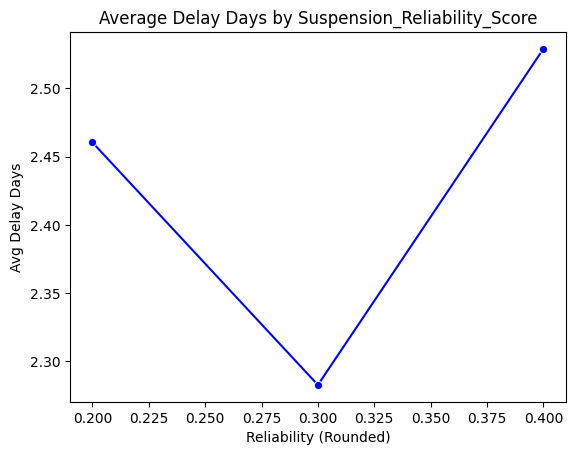

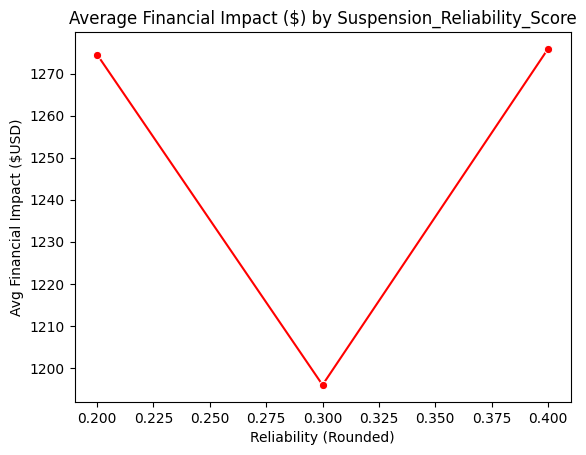

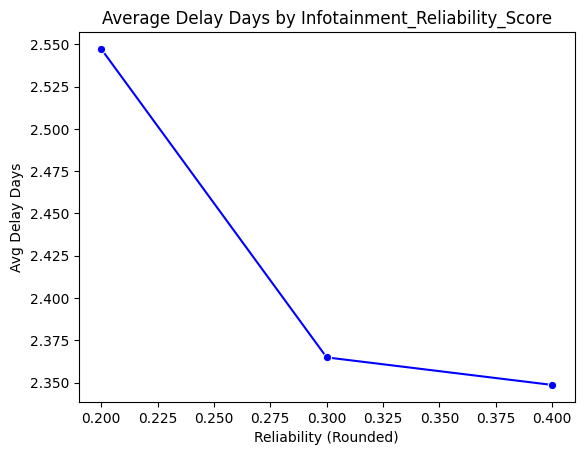

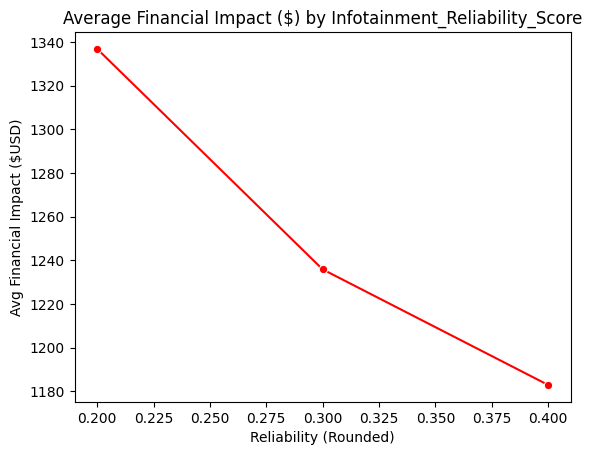

In [19]:
# Loop through each component reliability score
# and calculate average delay days & financial impact
reliability_cols = [
    'Engine_Reliability_Score',
    'Transmission_Reliability_Score',
    'Brake_System_Reliability_Score',
    'Suspension_Reliability_Score',
    'Infotainment_Reliability_Score'
]
# Plotting average delay days and financial impact for each rounded reliability score
for col in reliability_cols:
    df['Rounded_Reliability'] = df[col].round(1)   # Round to 1 decimal for grouping
    grouped = df.groupby('Rounded_Reliability')[['Delay_Days', 'Financial_Impact_USD']].mean().reset_index()
# Plot average delay days vs reliability
# Line plot: Reliability vs Delay Days
    sns.lineplot(x='Rounded_Reliability', y='Delay_Days', data=grouped, marker='o', color='blue')
    plt.title(f'Average Delay Days by {col}')
    plt.xlabel('Reliability (Rounded)')
    plt.ylabel('Avg Delay Days')
    plt.show()
  # Plot average financial impact vs reliability
  # Line plot: Reliability vs Financial Impact
    sns.lineplot(x='Rounded_Reliability', y='Financial_Impact_USD', data=grouped, marker='o', color='red')
    plt.title(f'Average Financial Impact ($) by {col}')
    plt.xlabel('Reliability (Rounded)')
    plt.ylabel('Avg Financial Impact ($USD)')
    plt.show()


Avg Financial Impact vs Engine_Reliability_Score

- Line plot of average financial impact against engine reliability score.

Insight: Significant drop in financial losses as reliability improves. Engines with lower reliability are major cost drivers.


## Step 19: Delay Rate By Supplier Group.

/tmp/ipython-input-22-4249507444.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_rates.index, y=delay_rates.values, palette="Blues_d")


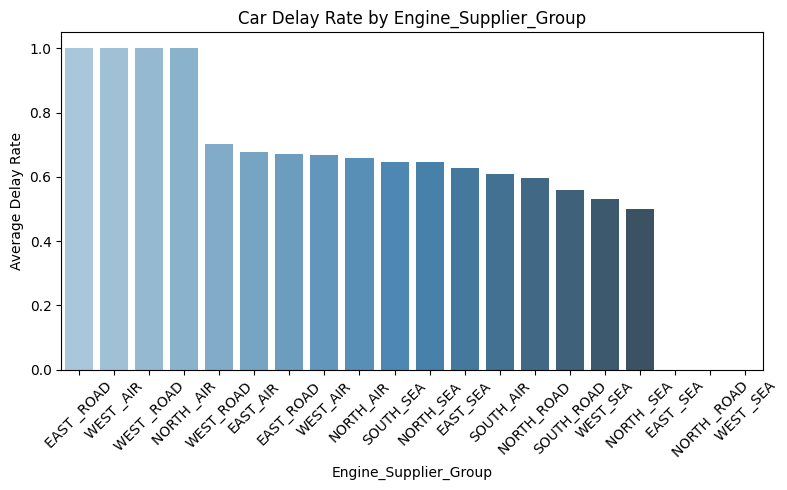

/tmp/ipython-input-22-4249507444.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_rates.index, y=delay_rates.values, palette="Blues_d")


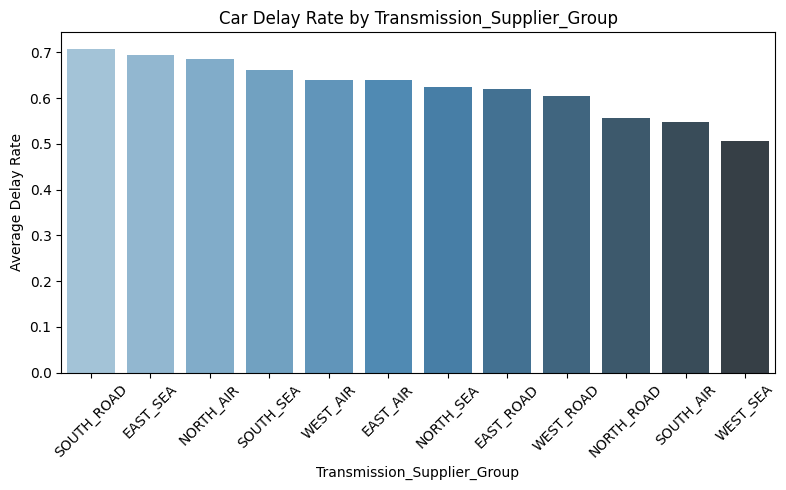

/tmp/ipython-input-22-4249507444.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_rates.index, y=delay_rates.values, palette="Blues_d")


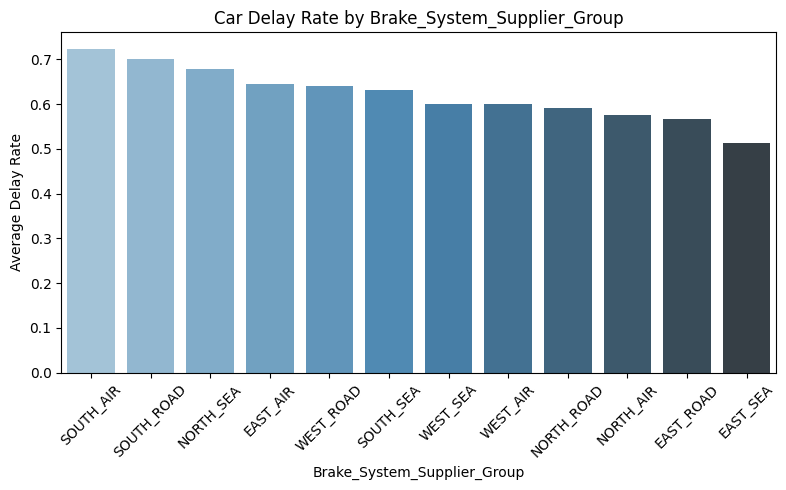

/tmp/ipython-input-22-4249507444.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_rates.index, y=delay_rates.values, palette="Blues_d")


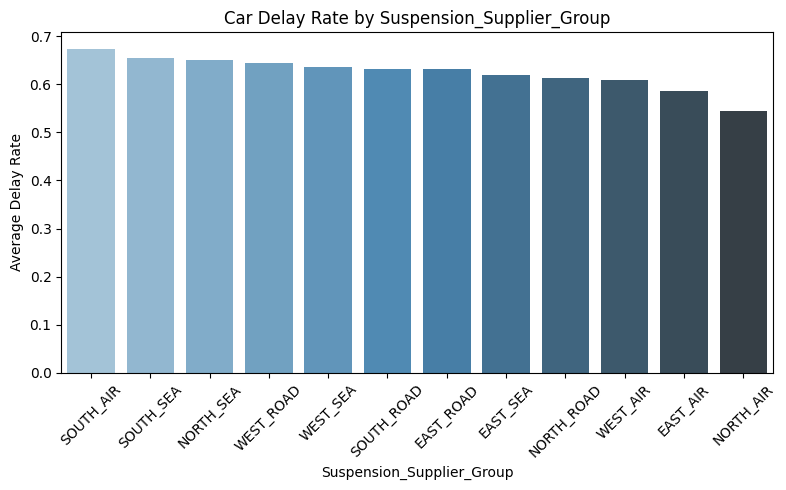

/tmp/ipython-input-22-4249507444.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_rates.index, y=delay_rates.values, palette="Blues_d")


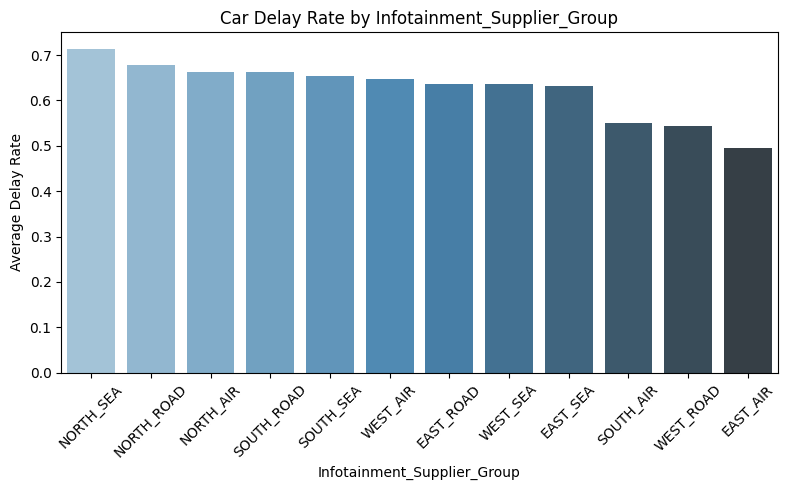

In [22]:
# Analyze delay rate by supplier group for each component
supplier_group_cols = [
    "Engine_Supplier_Group",
    "Transmission_Supplier_Group",
    "Brake_System_Supplier_Group",
    "Suspension_Supplier_Group",
    "Infotainment_Supplier_Group"
]

for col in supplier_group_cols:
    plt.figure(figsize=(8, 5))
    delay_rates = df.groupby(col)['Car_Delayed'].mean().sort_values(ascending=False)
    sns.barplot(x=delay_rates.index, y=delay_rates.values, palette="Blues_d")
    plt.ylabel("Average Delay Rate")
    plt.title(f"Car Delay Rate by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Step 20: Supplier_Performance_Score

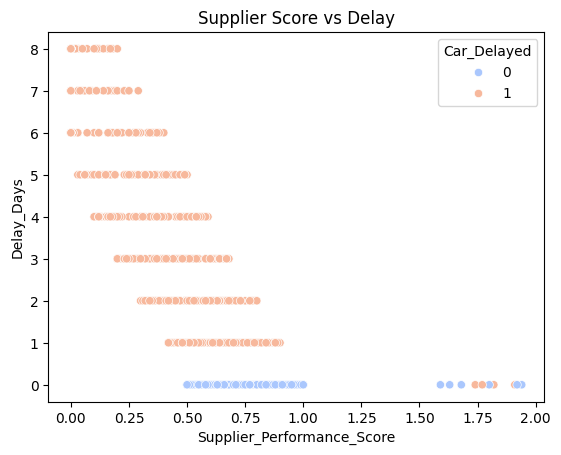

In [23]:
sns.scatterplot(x='Supplier_Performance_Score', y='Delay_Days', data=df, hue='Car_Delayed', palette='coolwarm')
plt.title('Supplier Score vs Delay')
plt.show()


## Step 21: Distance_KM

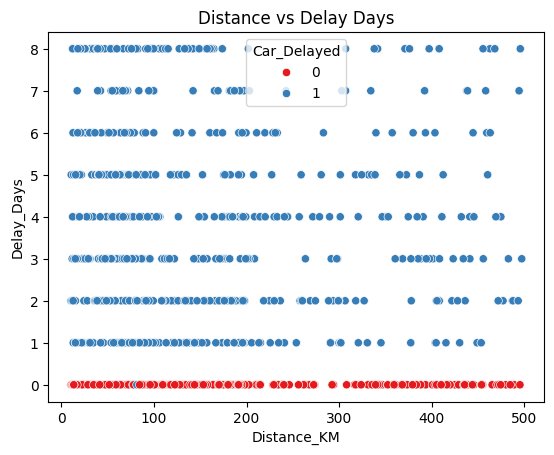

In [24]:
sns.scatterplot(x='Distance_KM', y='Delay_Days', data=df, hue='Car_Delayed', palette='Set1')
plt.title('Distance vs Delay Days')
plt.show()


## Step 22: Route_Type

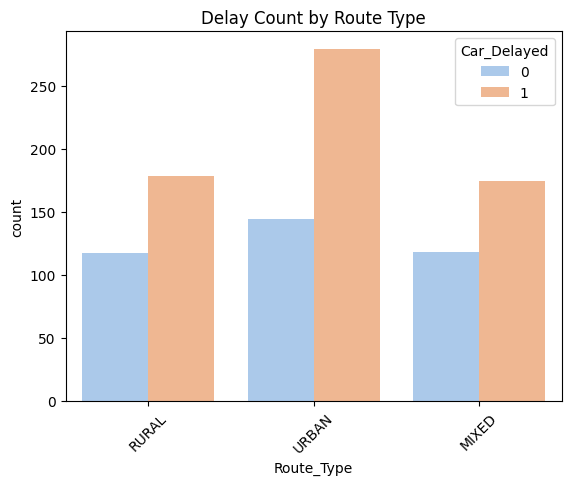

In [25]:
sns.countplot(x='Route_Type', hue='Car_Delayed', data=df, palette='pastel')
plt.title('Delay Count by Route Type')
plt.xticks(rotation=45)
plt.show()

## Step 23: Traffic_Severity_Index

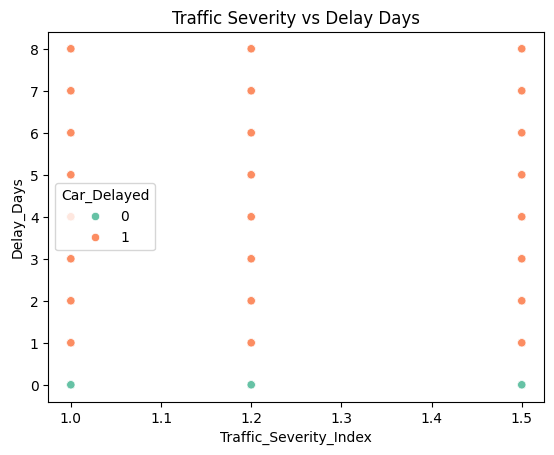

,Traffic_Severity_Index,Car_Delayed,Delay_Days
Traffic_Severity_Index,1.000000,0.319014,0.229647
Car_Delayed,0.319014,1.000000,0.724299
Delay_Days,0.229647,0.724299,1.000000


In [26]:
sns.scatterplot(x='Traffic_Severity_Index', y='Delay_Days', data=df, hue='Car_Delayed', palette='Set2')
plt.title('Traffic Severity vs Delay Days')
plt.show()

# Add to correlation matrix
df[['Traffic_Severity_Index', 'Car_Delayed', 'Delay_Days']].corr()

- Traffic Severity has a weak correlation with both Car_Delayed (0.32) and Delay_Days (0.23) — suggesting traffic may contribute slightly, but isn’t a major cause of delays.

- Car_Delayed and Delay_Days have a strong positive correlation (0.72) — if a car is delayed, the number of delay days tends to be higher.

- Traffic alone does not strongly influence delays, implying other factors (like part reliability or strikes) are more impactful.

## Step 24: Traffic_Level

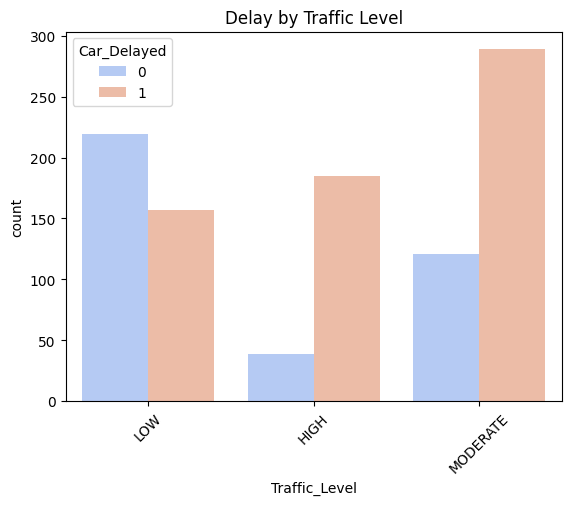

In [27]:
sns.countplot(x='Traffic_Level', hue='Car_Delayed', data=df, palette='coolwarm')
plt.title('Delay by Traffic Level')
plt.xticks(rotation=45)
plt.show()

## Step 24: Correlation Table

In [28]:
# Correlation with Target Variables Summary Table
correlation_summary = df.corr(numeric_only=True)[['Car_Delayed', 'Financial_Impact_USD']].sort_values(by='Car_Delayed', ascending=False)
correlation_summary.head(10)

,Car_Delayed,Financial_Impact_USD
Any_Critical_Part_Delayed,1.000000,0.688789
Car_Delayed,1.000000,0.688789
Valid_Delay,0.878553,0.595724
Delay_Days,0.724299,0.953019
Financial_Impact_USD,0.688789,1.000000
Total_Parts_Delayed,0.556527,0.451690
Traffic_Severity_Index,0.319014,0.206525
Brake_System_Delayed_Flag,0.263850,0.189479
Transmission_Delayed_Flag,0.263362,0.197507
Engine_Delayed_Flag,0.247595,0.198946


from matplotlib import pyplot as plt
_df_0['Car_Delayed'].plot(kind='hist', bins=20, title='Car_Delayed')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Financial_Impact_USD'].plot(kind='hist', bins=20, title='Financial_Impact_USD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Car_Delayed', y='Financial_Impact_USD', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Car_Delayed'].plot(kind='line', figsize=(8, 4), title='Car_Delayed')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Financial_Impact_USD'].plot(kind='line', figsize=(8, 4), title='Financial_Impact_USD')
plt.gca().spines[['top', 'right']].set_visible(False)

- Delay_Days is the strongest driver of cost — it has a very high correlation (0.95) with Financial_Impact_USD.

- Critical part delays directly cause full car delays — Any_Critical_Part_Delayed and Car_Delayed are perfectly correlated (1.00).

- Valid delays (like strikes or weather) are highly correlated with both Car_Delayed (0.88) and cost (0.60), showing they are major contributors.

## Business Insights
- Delays strongly impact cost: There is a clear linear relationship between delay days and financial losses.

- Q1 is the worst quarter for delays: January to March show significantly higher delays, suggesting seasonal staffing or supply issues.

- Critical components are high-risk: Engine and brake systems not only face frequent delays but also drive the most financial impact.

- Transmission and suspension show low reliability frequently: These are not isolated cases and need systemic improvement.

- Brake system delay shows bimodal trend: Suggests inconsistent supplier performance — possibly a mix of high- and low-quality suppliers.

- Urgent orders are often delayed: These are not being prioritized effectively, defeating the purpose of urgency.

- Evening shifts are more prone to delays and cost spikes: Indicates potential workforce or process inefficiencies.

- Supplier reliability varies widely: Especially for brakes and suspension; performance inconsistency is a major bottleneck.

- Strikes and storms significantly increase delays: Yet no robust contingency measures seem to be in place.

- Inventory buffer is underutilized or ineffective: Delays remain high even when buffer is available, indicating poor planning or allocation.

- Month 2 shows abnormal cost spike: Likely tied to demand surge, planning failure, or specific supplier issues.

- Infotainment and suspension delays don’t significantly affect cost: Not all part delays have equal financial weight.

- Production shift has minor influence: Shift timing alone is not a strong predictor of delay or cost, aside from evening patterns.

## What's Next?

- Prepare data for modeling by selecting top correlated features, balancing class labels, and handling skewed targets.
- Train a classification model (e.g., Random Forest, XGBoost) to predict shipment delays.
- Evaluate model performance using precision, recall, and business cost impact.